# Predicting heart disease using machine learning

This notebook looks into using various Python-based machne learning and data science libraries in an attempt a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

we're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimention

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the *Kaggle* https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

There is also different datasets for machine learning.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. `age` - age in years
2. `sex`- (1 = male; 0 = female)
3. `cp` - chest pain type (4 values)
    * 0: Typical angina: chest pain related decrease blood supply to the hear
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-angina: chest pain not related to heart
    * 3: Asymptomatic: chest pain not showing signs of disease
    
4. `trestbps`- resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol`- serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
    
6. `fbs` - (fasting blood sugar > 120 mg/dl)(1 =  true; 0= false)
    * \'>126' mg/dL signals diabetes
    
7. `restecg` - resting electrocardiographic results 
    * 0: Nothing to note
    * 1: StT-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
        
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart
11. `slope` - the slope of the peak exercise ST segment
    * 0: Unsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healty heart)
    * 2: Downsloping: signs of unhealthy heart
    
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal`- thalium stress result
    * 0 = normal
    * 1 = fixed defect
    * 2 = reversable defect
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

we're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

* `import pandas as pd`
* `import numpy as np`
* `import matplotlib.pyplot as plt`
* `%matplotlib inline`

In [188]:
# Import all the tools we need

# Ignore FutureWarnings
import warnings
warnings.filterwarnings("ignore")

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [29]:
df = pd.read_csv("../data/heart.csv")
df.shape # (rows, columns)

(1025, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [31]:
# Top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
# Bottom 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [35]:
# Let's find out how many of each class there
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

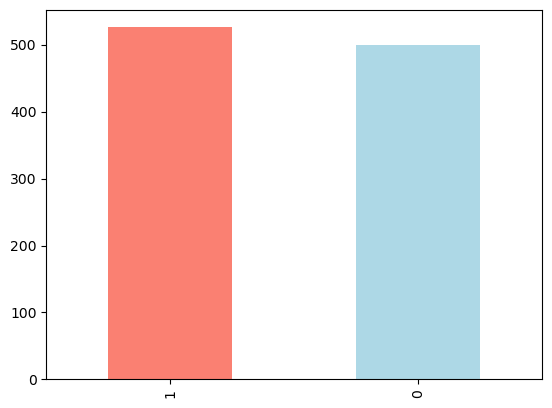

In [39]:
# Plot showing Heart disease vs not heart disease
target_plot = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
target_plot;

In [41]:
# Get information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [42]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
# Get description of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  Heart Disease Frequency according to Sex

In [44]:
# Get value counts of heart disease frequency to sex
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [45]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


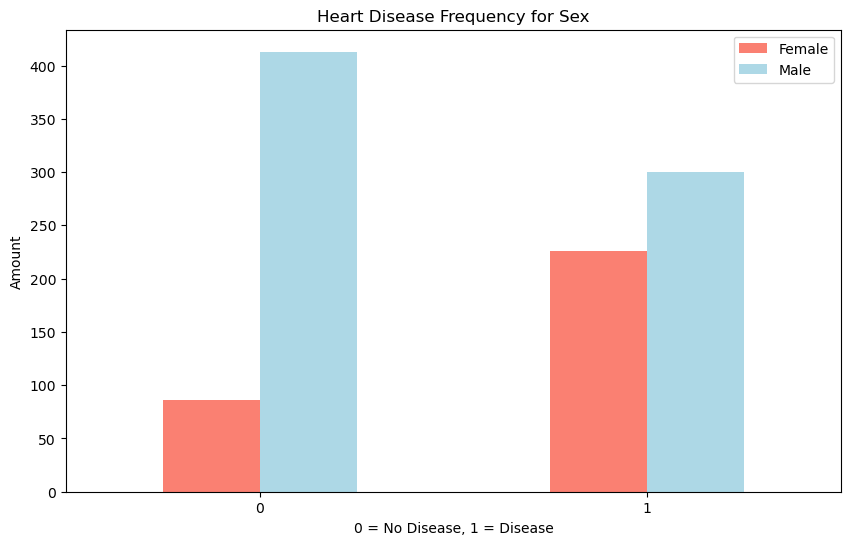

In [50]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

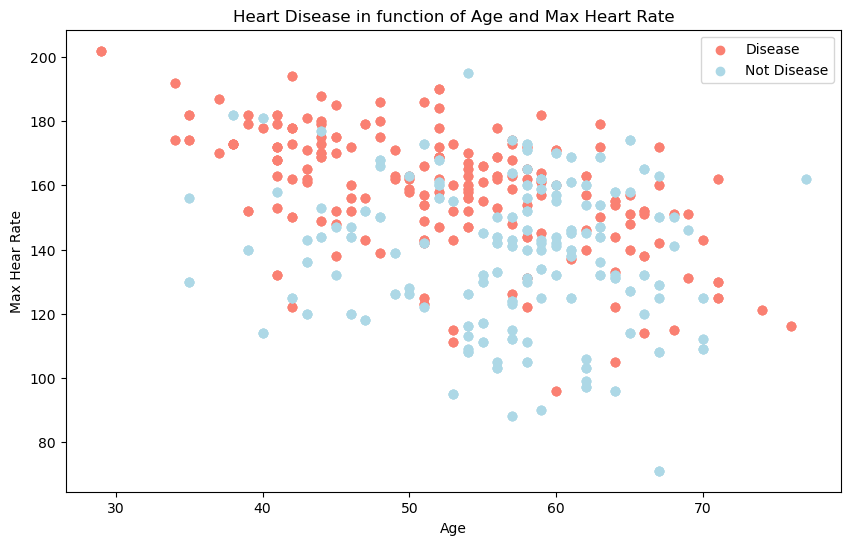

In [62]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Max Hear Rate")
plt.xticks(rotation=0);

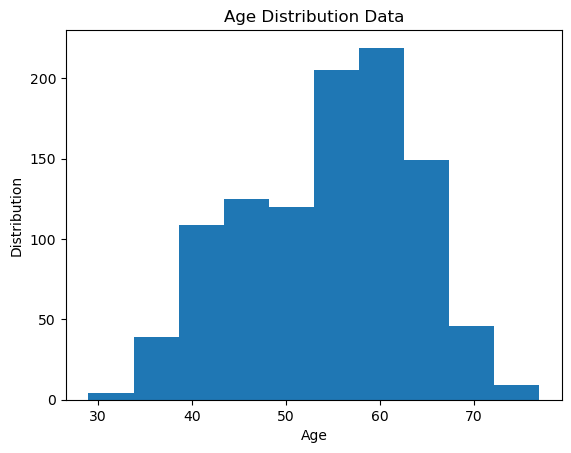

In [67]:
# Check the distribution of the age column with histogram
df.age.plot.hist()

plt.title("Age Distribution Data")
plt.xlabel("Age")
plt.ylabel("Distribution");

### Heart Disease Frequency per Chest Pain Type

3. `cp` - chest pain type (4 values)
    * 0: Typical angina: chest pain related decrease blood supply to the hear
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-angina: chest pain not related to heart
    * 3: Asymptomatic: chest pain not showing signs of disease

In [68]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


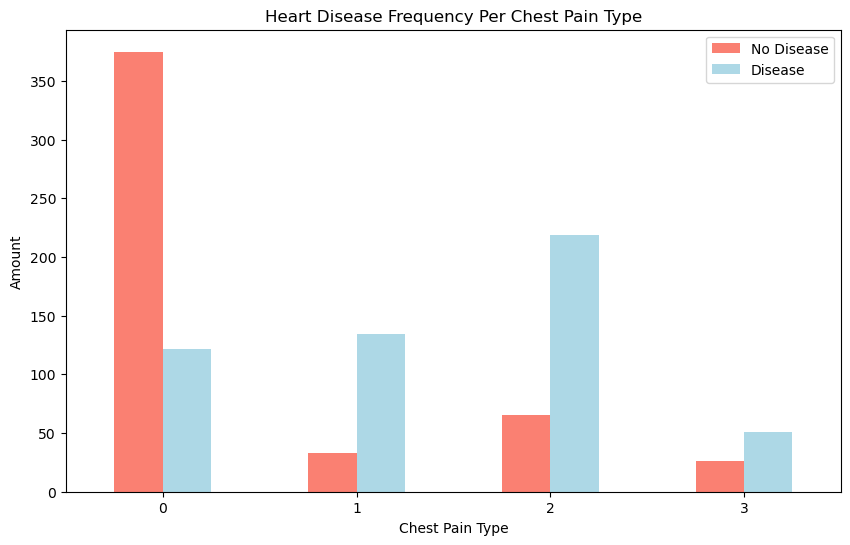

In [72]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [74]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


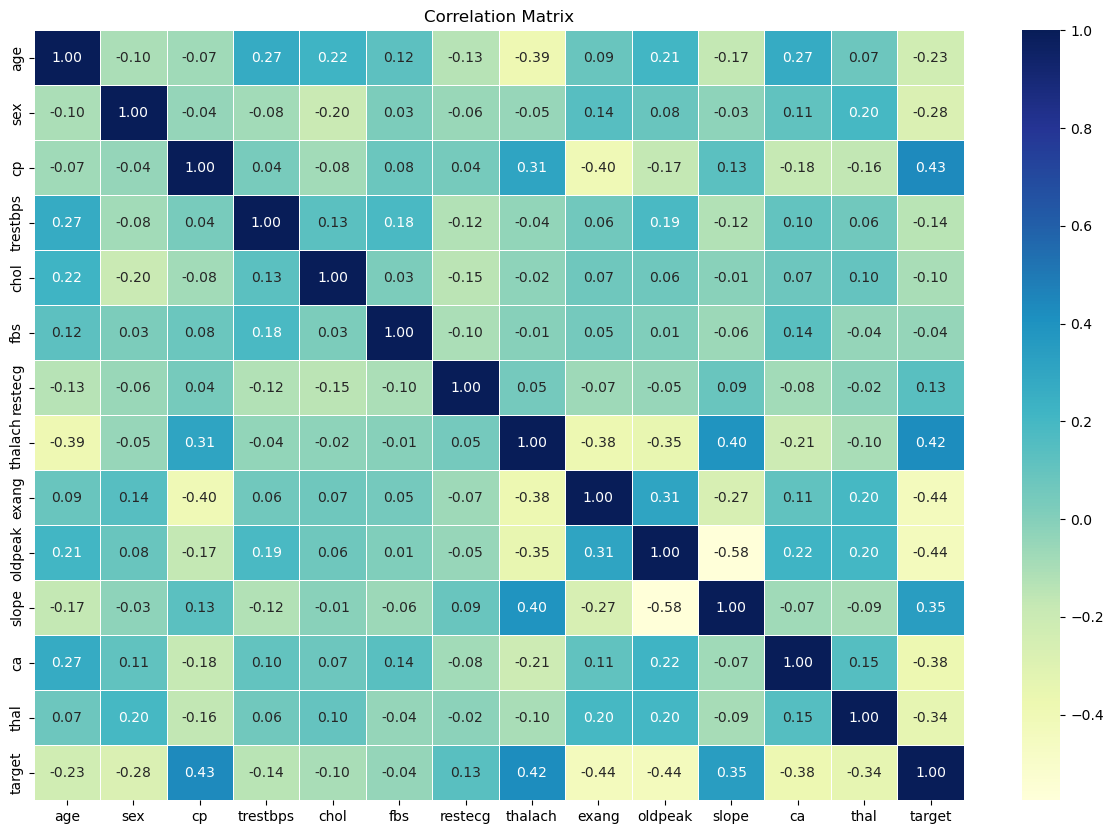

In [79]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.title("Correlation Matrix");


## 5. Modelling

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [81]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [84]:
# Split data into train and test data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patters) on the training set.

And we'll test it (use the patters) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [88]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models :  a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop throug models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [189]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Model Comparison

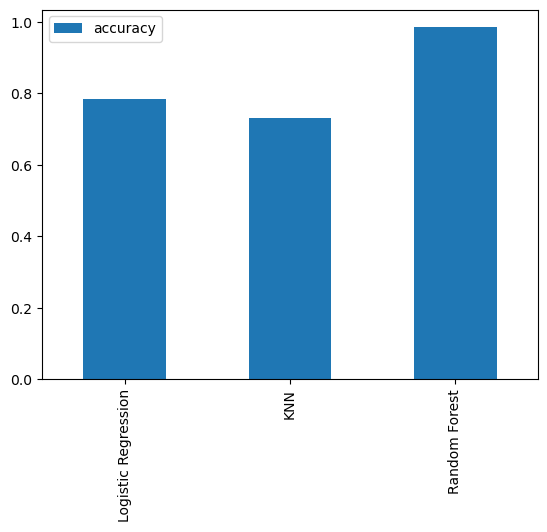

In [91]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model.. and we know a model's first predictions aren't always what we should based our next steps off. What should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning by hand

In [190]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i, metric='minkowski')
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


In [191]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

Maximum KNN score on the test data: 98.54%


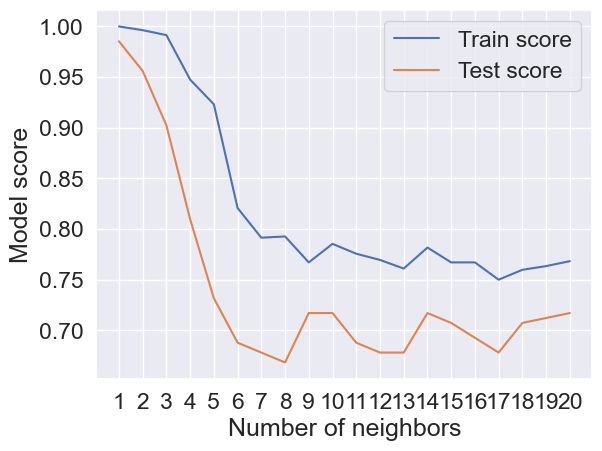

In [192]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* `LogisticRegresssion()`
* `RandomForestClassifier()`

... using `RandomizedSearchCV()`


In [193]:
# Create a hyperparameter grid for LogisticRegresion()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using `RandomizedSearchCV()`

In [194]:
# Tune LogisticRegression()

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [195]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [196]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

Now we've tuned `LogisticRegression()` let's do the same for `RandomForestClassifier()`...

In [197]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [198]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [199]:
# Evaluate the randomzied search RandoForestClassifier model
rs_rf.score(X_test, y_test)

0.926829268292683

In [200]:
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

## Hyperparameter Tuning with GridSearchCV

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [201]:
# Different hyperparameters for our RandomForestClassifier estimator.
rf_grid = {"n_estimators": [100, 510],
          "max_depth": [None],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf_clf = GridSearchCV(RandomForestClassifier(),
                        param_grid=rf_grid,
                        cv=5,
                        verbose=True)
# Fit grid hyperparameter search model
gs_rf_clf.fit(X_train, y_train);

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [202]:
# Check the best hyperparameters for RandomForestClassifier
gs_rf_clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 510}

In [203]:
# Evaluate the grid search RandomForestClassifier estimator
gs_rf_clf.score(X_test, y_test)

0.9853658536585366

Let's try use SearchGridCV with LogisticRegression model

In [204]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [205]:
# Check the best hyperparameters for LogisticRegression
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [206]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7853658536585366

In [207]:
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [208]:
# Make predictions with tuned model
rf_y_preds = gs_rf_clf.predict(X_test)
log_reg_y_preds = gs_log_reg.predict(X_test)

In [209]:
rf_y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [210]:
log_reg_y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

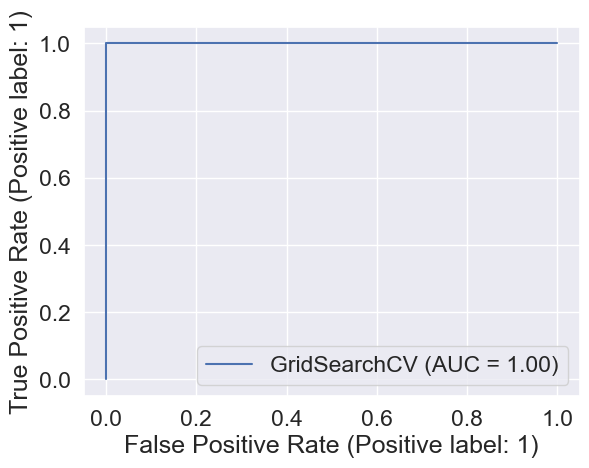

In [211]:
# Plot ROC and AUC curves and calculate RandomForestClassifier with SearchGridCV
plot_roc_curve(gs_rf_clf, X_test, y_test);

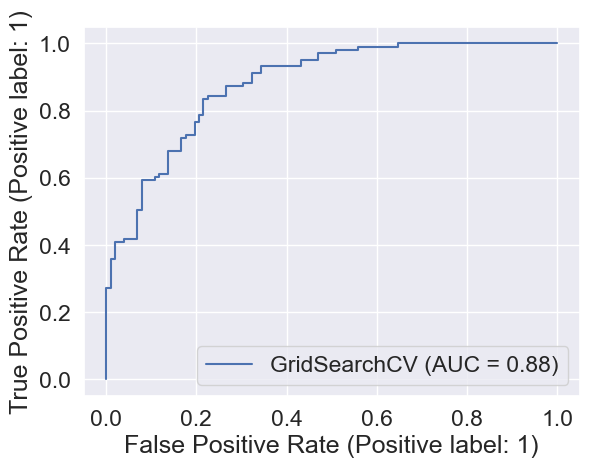

In [212]:
# Plot ROC and AUC curves and calculate RandomForestClassifier with SearchGridCV
plot_roc_curve(gs_log_reg, X_test, y_test);

In [213]:
# Confusion matrix
# Function to plot confusion matrix
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, # Annotate the boxes
                    cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis
    

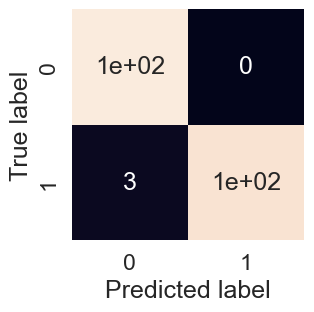

In [216]:
# Plot confustion matrix for RandomForestClassifier with SearchGridCV
plot_conf_mat(y_test, rf_y_preds);


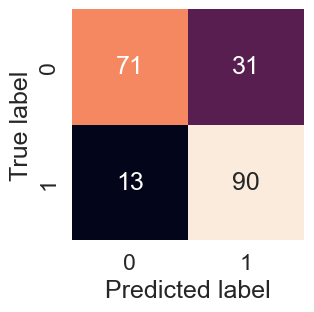

In [217]:
# Plot confustion matrix for LogisticRegression with SearchGridCV
plot_conf_mat(y_test, log_reg_y_preds);

Now we've got ROC curve, an AUC metric and a confusion matrix. let's get a classifiction report as well as cross-validated precision, recall and f1-score.

In [218]:
# Classification report: RandomForestClassifier() using one split
print(classification_report(y_test, rf_y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [219]:
# Classification report: LogisticRegression() using one split
print(classification_report(y_test, log_reg_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [220]:
# Check best hyperparmeters LogisticRegression
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [221]:
# Check best hyperparameters RandomForestClassifier
gs_rf_clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 510}

In [222]:
# Create a new classifiers with best parameters

clf_1 = LogisticRegression(C=1.3738237958832638,
                          solver="liblinear")
clf_2 = RandomForestClassifier(n_estimators=100,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              max_depth=None)


In [223]:
# Cross-validated accuracy

# LogisticRegression accuracy
cv_log_acc = cross_val_score(clf_1,
                             X,
                             y,
                            cv=5,
                            scoring="accuracy")

# RandomForestClassifier accuracy
cv_rf_acc = cross_val_score(clf_2,
                           X,
                           y,
                           cv=5,
                           scoring="accuracy")
cv_log_acc = np.mean(cv_log_acc)
cv_rf_acc = np.mean(cv_rf_acc)
print(f"LogisticRegression Cross-validation Accuracy: {cv_log_acc*100:.2f}%")
print(f"RandomForestClassifier Cross-validation Accuracy: {cv_rf_acc*100:.2f}%")

LogisticRegression Cross-validation Accuracy: 84.78%
RandomForestClassifier Cross-validation Accuracy: 99.71%


In [224]:
# Cross-validated precision

# LogisticRegression precision
cv_log_prec = cross_val_score(clf_1,
                            X,
                            y,
                            cv=5,
                            scoring="precision")

# RadomForestClassifier precision
cv_rf_prec = cross_val_score(clf_2,
                            X,
                            y,
                            scoring="precision")

cv_log_prec = np.mean(cv_log_prec)
cv_rf_prec = np.mean(cv_rf_prec)

print(f"LogisticRegression Cross-validation Precision: {cv_log_prec*100:.2f}%")
print(f"RandomForestClassifier Cross-validation Precision: {cv_rf_prec*100:.2f}%")

LogisticRegression Cross-validation Precision: 82.26%
RandomForestClassifier Cross-validation Precision: 99.45%


In [225]:
# Cross-validated recall

# LogisticRegression recall
cv_log_recall = cross_val_score(clf_1,
                               X,
                               y,
                               scoring="recall")

# RandomForestClassifier recall
cv_rf_recall = cross_val_score(clf_2,
                              X,
                              y,
                              scoring="recall")

cv_log_recall = np.mean(cv_log_recall)
cv_rf_recall = np.mean(cv_rf_recall)

print(f"LogisticRegression Cross-validation Recall: {cv_log_recall*100:.2f}%")
print(f"RandomForestClassifier Cross-validation Recall: {cv_rf_recall*100:.2f}%")

LogisticRegression Cross-validation Recall: 89.74%
RandomForestClassifier Cross-validation Recall: 100.00%


In [226]:
# Cross-validated F1-score

# LogisticRegression F1-score
cv_log_f1 = cross_val_score(clf_1,
                           X,
                           y,
                           scoring="f1")

# RandomForestClassifier F1-score
cv_rf_f1 = cross_val_score(clf_2,
                          X,
                          y,
                          scoring="f1")

cv_log_f1 = np.mean(cv_log_f1)
cv_rf_f1 = np.mean(cv_rf_f1)

print(f"LogisticRegression Cross-validation F1-score: {cv_log_f1*100:.2f}%")
print(f"RandomForestClassifier Cross-validation F1-score: {cv_rf_f1*100:.2f}%")

LogisticRegression Cross-validation F1-score: 85.83%
RandomForestClassifier Cross-validation F1-score: 99.72%


In [227]:
print("Cross-validation Scores LogisticRegression vs. RandomForestClassifier")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
print(f" Accuracy: LogisticRegression {cv_log_acc*100:.2f}% vs. {cv_rf_acc*100:.2f}% RandomForestClassifier")

print(f" Precision: LogisticRegression {cv_log_prec*100:.2f}% vs. {cv_rf_prec*100:.2f}% RandomForestClassifier")

print(f" Recall: LogisticRegression {cv_log_recall*100:.2f}% vs. {cv_rf_recall*100:.2f}% RandomForestClassifier")

print(f" F1-score: LogisticRegression {cv_log_f1*100:.2f}% vs. {cv_rf_f1*100:.2f}% RandomForestClassifier")


Cross-validation Scores LogisticRegression vs. RandomForestClassifier
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 Accuracy: LogisticRegression 84.78% vs. 99.71% RandomForestClassifier
 Precision: LogisticRegression 82.26% vs. 99.45% RandomForestClassifier
 Recall: LogisticRegression 89.74% vs. 100.00% RandomForestClassifier
 F1-score: LogisticRegression 85.83% vs. 99.72% RandomForestClassifier


In [228]:
# Visualize cross-validated metrics

# LogisticRegression
cv_log_metrics = pd.DataFrame({"Accuracy": cv_log_acc,
                               "Precision": cv_log_prec,
                               "Recall": cv_log_recall,
                               "F1-score": cv_log_f1},
                             index=[0])

# RandomForestClassifier
cv_rf_metrics = pd.DataFrame({"Accuracy": cv_rf_acc,
                               "Precision": cv_rf_prec,
                               "Recall": cv_rf_recall,
                               "F1-score": cv_rf_f1},
                            index=[0])

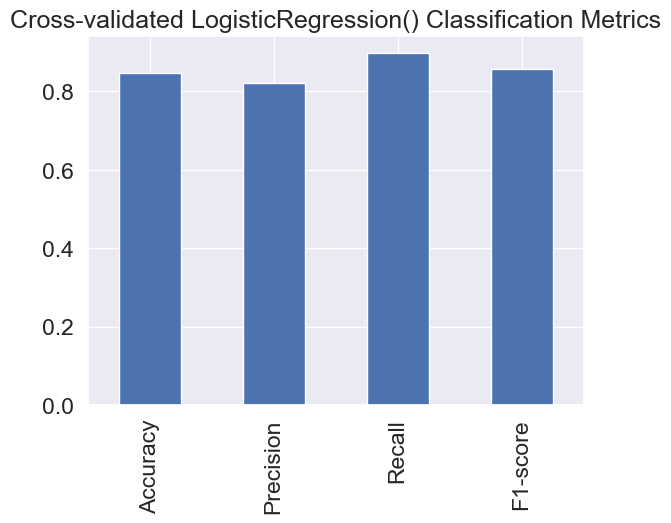

In [230]:
cv_log_metrics.T.plot.bar(title="Cross-validated LogisticRegression() Classification Metrics", legend=False);


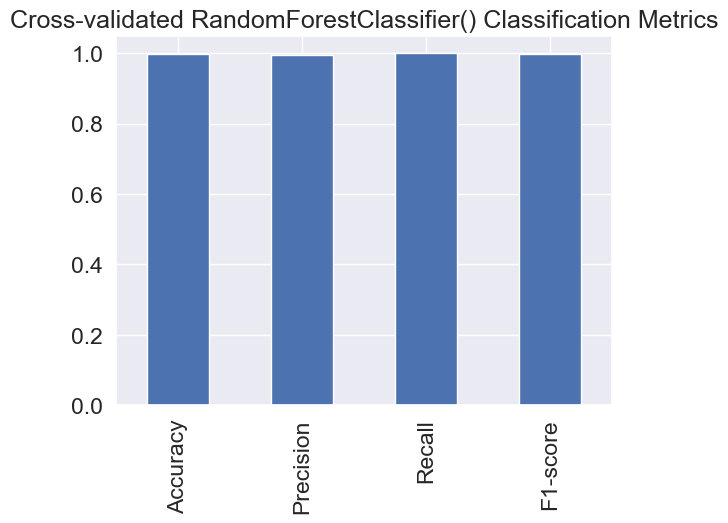

In [231]:
cv_rf_metrics.T.plot.bar(title="Cross-validated RandomForestClassifier() Classification Metrics", legend=False);

### Feature Importance

Feature importnce is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. On way to find feature importance is to search for "(MODEL NAME) feature importance".

Lt's find the feature importance for our LogisticRegression model and RandomForestClassifier.


In [242]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [246]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

logistic = LogisticRegression(C=1.3738237958832638,
                          solver="liblinear")
logistic.fit(X_train, y_train)

# Fit an instance of RandomForestClassifier
forest = RandomForestClassifier(n_estimators=510,
                               min_samples_leaf=1,
                               min_samples_split=2,
                               max_depth=None)
forest.fit(X_train, y_train);

In [247]:
# Check coef_ for LogisticRegression
logistic.coef_

array([[ 0.01317743, -1.66617348,  0.85032309, -0.01559003, -0.00820116,
        -0.20361104,  0.32268937,  0.0348884 , -0.78929065, -0.64874229,
         0.56657744, -0.81427836, -1.03688622]])

In [249]:
# Check feature_importances_ for RandomForestClassifier
forest.feature_importances_

array([0.08269056, 0.02936008, 0.13829035, 0.06847457, 0.07980319,
       0.00815079, 0.01833453, 0.11824403, 0.05080946, 0.11469458,
       0.04468366, 0.1247346 , 0.1217296 ])

In [273]:
# Match coef's of features to columns
log_feature_dict = dict(zip(df.columns, list(logistic.coef_[0])))
log_feature_dict
# Match feature importnces to columns
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
rf_feature_dict = dict(zip(df.columns, list([forest.feature_importances_[0]])))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

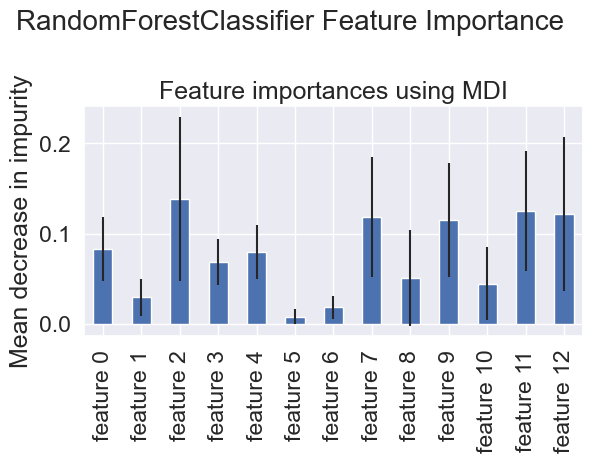

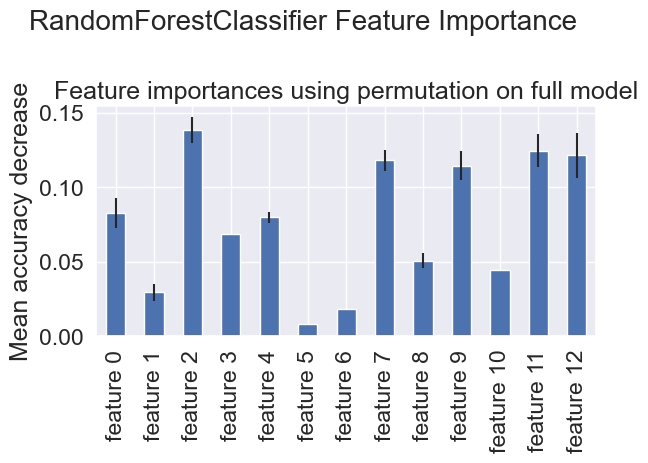

In [296]:

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
fig.suptitle('RandomForestClassifier Feature Importance', fontsize=20)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.suptitle('RandomForestClassifier Feature Importance', fontsize=20)
fig.tight_layout()
plt.show();


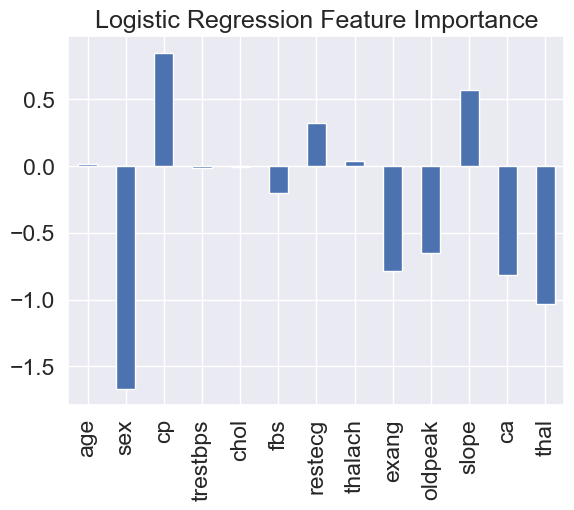

In [294]:
# Visualize LogisticRegression feature importance
logistic_feature_df = pd.DataFrame(log_feature_dict, index=[0])
logistic_feature_df.T.plot.bar(title="Logistic Regression Feature Importance", legend=0);

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

